In [1]:

import numpy as np # linear algebra
import pandas as pd
df_train = pd.read_csv('https://raw.githubusercontent.com/dumitrescustefan/Romanian-Transformers/examples/examples/sentiment_analysis/ro/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/dumitrescustefan/Romanian-Transformers/examples/examples/sentiment_analysis/ro/test.csv')


In [2]:
np.unique(df_train['label'])

array([0, 1])

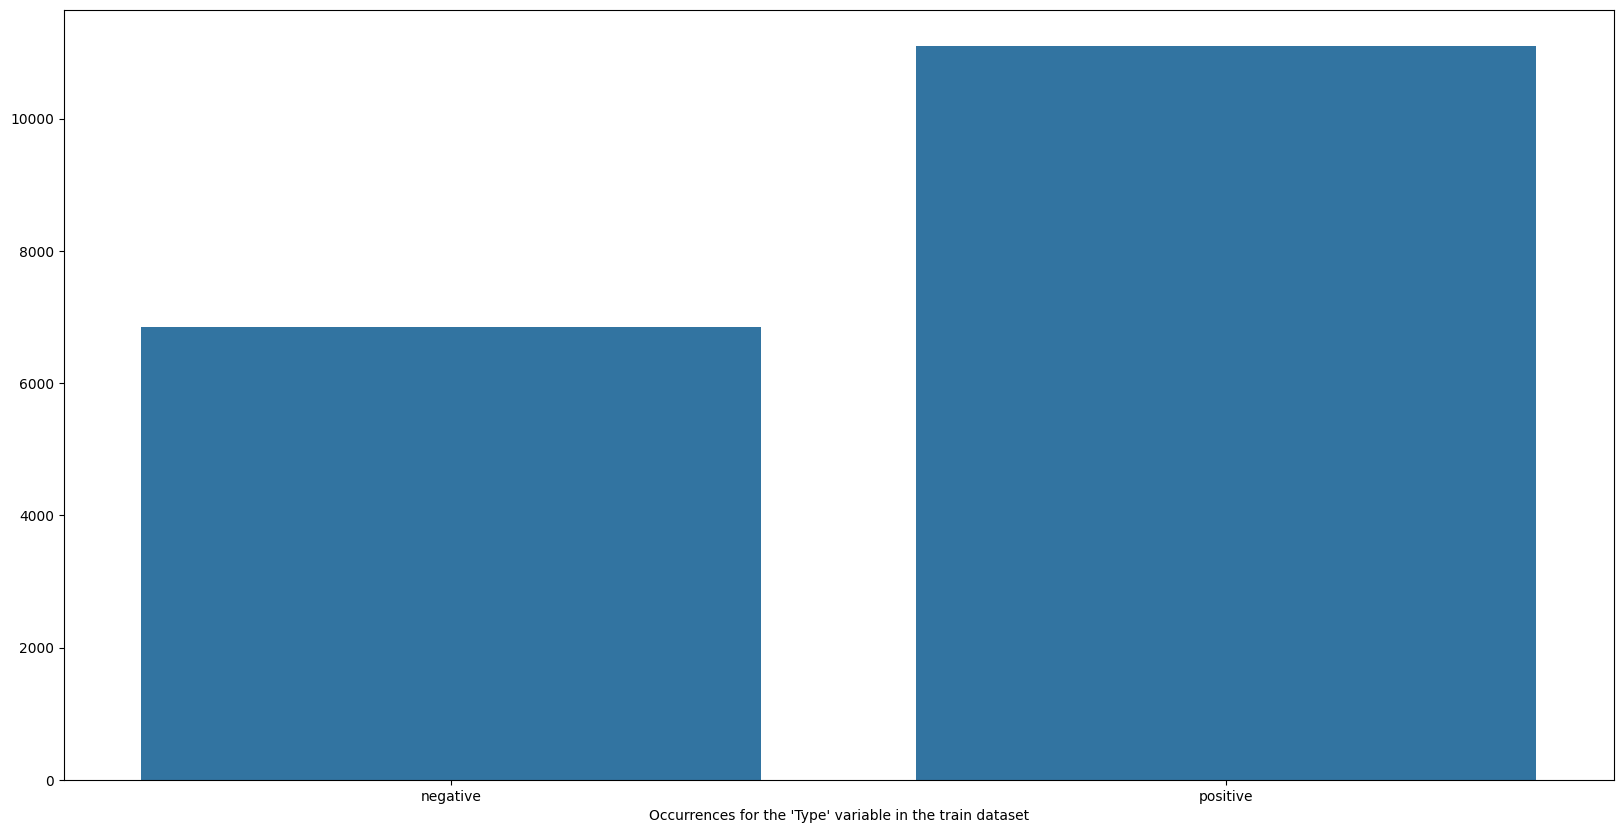

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
val, cnt = np.unique(df_train['label'], return_counts=True)
plt.figure(figsize=(20, 10))
val2 = []
for idx, el in enumerate(val.copy()):
    if el == 0:
        val2.append('negative')
    else:
        val2.append('positive')

plt.xlabel(f"Occurrences for the 'Type' variable in the train dataset")
sns.barplot(x=val2, y=cnt)
plt.show()

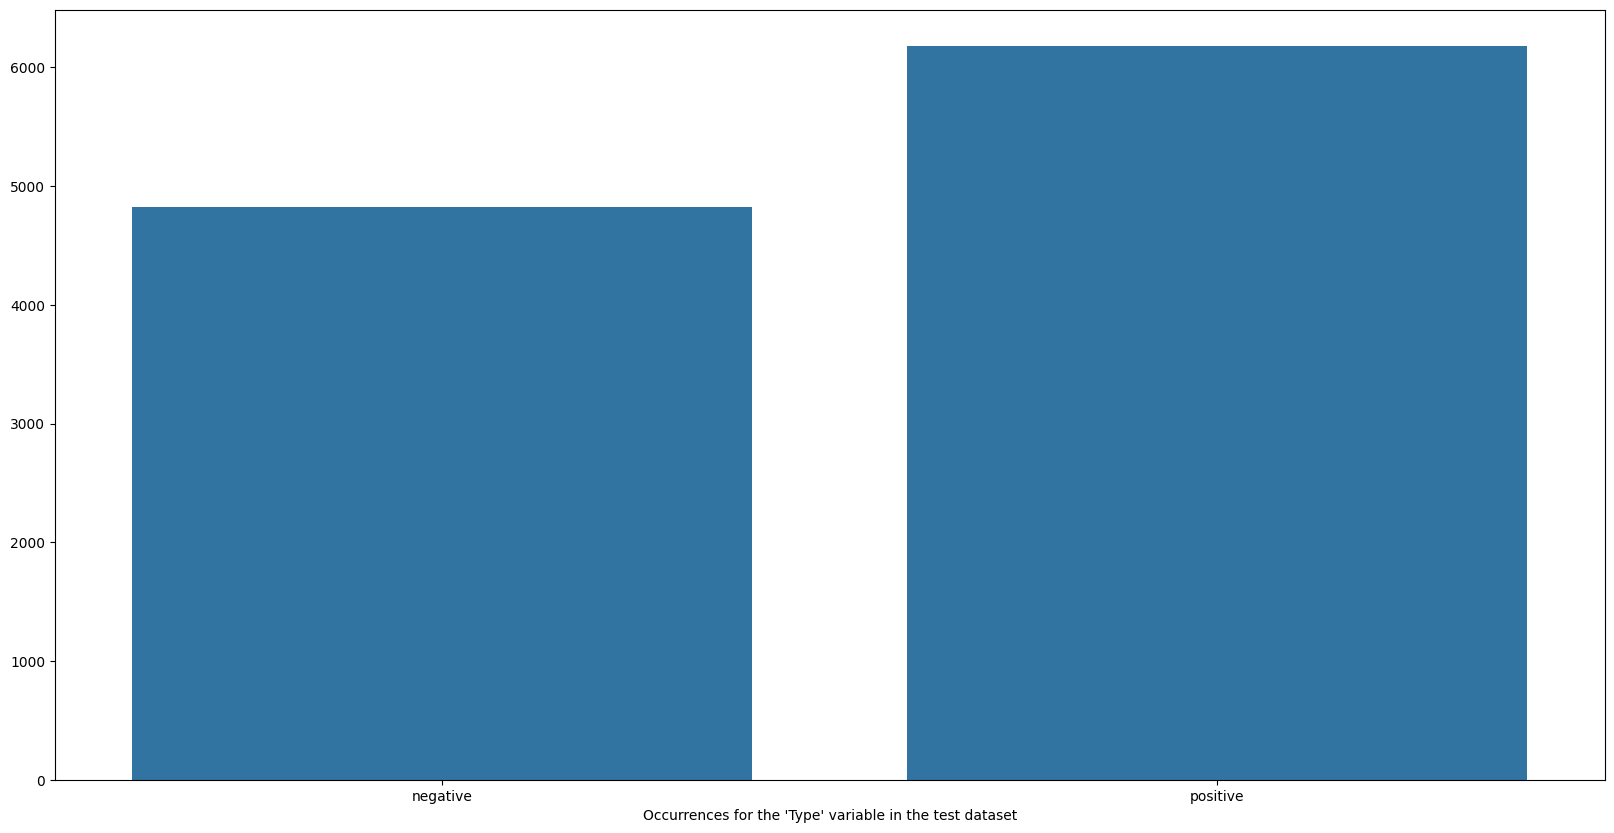

In [4]:
val, cnt = np.unique(df_test['label'], return_counts=True)
plt.figure(figsize=(20, 10))
val2 = []
for idx, el in enumerate(val.copy()):
    if el == 0:
        val2.append('negative')
    else:
        val2.append('positive')

plt.xlabel(f"Occurrences for the 'Type' variable in the test dataset")
sns.barplot(x=val2, y=cnt)
plt.show()

In [5]:
df_train['text']

0        acest document mi-a deschis cu adevarat ochii ...
1        tine mancarea rece. ce altceva ii mai trebuie?...
2                                      excelent\nrecomand!
3        ca un rocker imbatranit, acest film mentioneaz...
4        ei bine, a facut o groaza veche si foarte intu...
                               ...                        
17936    grija la notificari\ncand am cumparat telefonu...
17937    sotia mea si cu mine imi place sa inchiriem fi...
17938    nu stiu cum puteti da calificative si stele un...
17939    tradarea vine din insasi citirea ceatiei. vezi...
17940    serios ce naiba a fost acest film despre ,, pu...
Name: text, Length: 17941, dtype: object

In [6]:
df_train['text_length'] = df_train['text'].apply(lambda x: 0 if x!=x else len(x))

In [7]:
df_test['text_length'] = df_test['text'].apply(lambda x: 0 if x!=x else len(x))

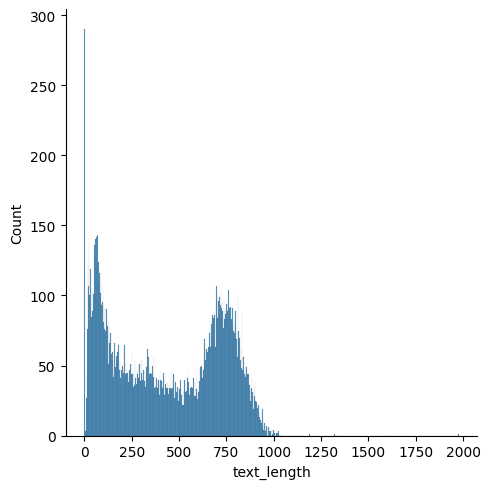

In [8]:
sns.displot(df_train, x="text_length", binwidth=3)

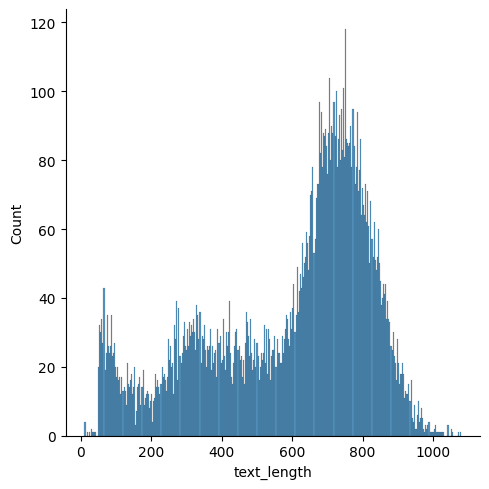

In [9]:
sns.displot(df_test, x="text_length", binwidth=3)

There a lot of nan values, which are zero, and some little outliers for train

While for test, there are no so extreme outliers, and few nan values. And the text shorter than 250 are fewer compared to train

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val =  train_test_split(df_train, test_size=0.2, random_state=42)

In [12]:
df_train2 = pd.concat([X_train], ignore_index=True)
df_val2 = pd.concat([X_val], ignore_index=True)

In [13]:
import re
df_train2['text_token'] = df_train2['text'].apply(lambda x: x if x!=x else x.lower())
df_train2['text_token'] = df_train2['text_token'].apply(lambda x: x if x!=x else re.sub(r'\d+','',x))
df_train2['text_token'] = df_train2['text_token'].apply(lambda x: x if x!=x else re.sub(r'-',' ', x))

df_train2['text_token'] = df_train2['text_token'].apply(lambda x: x if x!=x else re.sub(r'[^\w\s]','', x))
df_train2['text_token'] = df_train2['text_token'].apply(lambda x: x if x!=x else re.sub(r'(\n+)',' ', x))
df_train2['text_token'] = df_train2['text_token'].apply(lambda x: x if x!=x else x.strip())

In [14]:
df_train2['text_token'] = df_train2['text_token'].apply(lambda x: "" if x!=x else x)

In [15]:
import re
df_val2['text_token'] = df_val2['text'].apply(lambda x: x if x!=x else x.lower())
df_val2['text_token'] = df_val2['text_token'].apply(lambda x: x if x!=x else re.sub(r'\d+','',x))
df_val2['text_token'] = df_val2['text_token'].apply(lambda x: x if x!=x else re.sub(r'-',' ', x))

df_val2['text_token'] = df_val2['text_token'].apply(lambda x: x if x!=x else re.sub(r'[^\w\s]','', x))
df_val2['text_token'] = df_val2['text_token'].apply(lambda x: x if x!=x else re.sub(r'(\n+)',' ', x))
df_val2['text_token'] = df_val2['text_token'].apply(lambda x: x if x!=x else x.strip())
df_val2['text_token'] = df_val2['text_token'].apply(lambda x: "" if x!=x else x)

In [16]:
import re
df_test['text_token'] = df_test['text'].apply(lambda x: x if x!=x else x.lower())
df_test['text_token'] = df_test['text_token'].apply(lambda x: x if x!=x else re.sub(r'\d+','',x))
df_test['text_token'] = df_test['text_token'].apply(lambda x: x if x!=x else re.sub(r'-',' ', x))

df_test['text_token'] = df_test['text_token'].apply(lambda x: x if x!=x else re.sub(r'[^\w\s]','', x))
df_test['text_token'] = df_test['text_token'].apply(lambda x: x if x!=x else re.sub(r'(\n+)',' ', x))
df_test['text_token'] = df_test['text_token'].apply(lambda x: x if x!=x else x.strip())
df_test['text_token'] = df_test['text_token'].apply(lambda x: "" if x!=x else x)

In [17]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
romanian_stopwords = set(stopwords.words("romanian"))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
import warnings
warnings.filterwarnings("ignore")


In [19]:
!python -m spacy download ro_core_news_sm

/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 82.6 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('ro_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [20]:
import spacy
from spacy.lang.ro.examples import sentences
def values(df):
    nlp = spacy.load("ro_core_news_sm")
    texts = df['text_token'].to_list()
    docs = list(nlp.pipe(texts, n_process=4, batch_size=2000))
    docs_elements = list(map(lambda x: (list(filter(lambda y: y.text not in romanian_stopwords and len(str(y.text)) > 1, x))), docs))
    dictionary_item = {}
    dictionary_item_num = {}
    idx = 1
    dict_elements = []

    for elements in docs_elements:
        wd_list = []
        for wd in elements:
            if wd.text not in dictionary_item.keys():
                dictionary_item[wd.text] = idx+1
                dictionary_item_num[idx+1] = wd.text
                idx+=1
            wd_list.append(dictionary_item[wd.text])
        dict_elements.append(wd_list)

    return dictionary_item, dictionary_item_num, wd_list, texts, docs, docs_elements, dict_elements
dictionary_item, dictionary_item_num, wd_list, texts, docs, docs_elements, dict_elements = values(df_train2)


In [21]:
def values2(df, dictionary_item, dictionary_item_num):
    nlp = spacy.load("ro_core_news_sm")
    texts = df['text_token'].to_list()
    docs = list(nlp.pipe(texts, n_process=4, batch_size=2000))
    docs_elements = list(map(lambda x: (list(filter(lambda y: y.text not in romanian_stopwords and len(str(y.text)) > 1, x))), docs))


    dict_elements = []

    for elements in docs_elements:
        wd_list = []
        for wd in elements:
            if wd.text not in dictionary_item.keys():
                dictionary_item[wd.text] = 1
                dictionary_item_num[1] = 'UNKNOWN'
            wd_list.append(dictionary_item[wd.text])
        dict_elements.append(wd_list)
    return dictionary_item, dictionary_item_num, wd_list, texts, docs, docs_elements, dict_elements

dictionary_item_test, dictionary_item_num_test, wd_list_test, texts_test, docs_test, docs_elements_test,dict_elements_test = values2(df_test,dictionary_item.copy(), dictionary_item_num.copy())
dictionary_item_val, dictionary_item_num_val, wd_list_val, texts_val, docs_val, docs_elements_val, dict_elements_val = values2(df_val2, dictionary_item.copy(), dictionary_item_num.copy())


In [22]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ro.300.bin.gz


--2026-01-17 11:44:22--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ro.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.118, 3.171.22.68, 3.171.22.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4508185279 (4.2G) [application/octet-stream]
Saving to: ‘cc.ro.300.bin.gz’

cc.ro.300.bin.gz    100%[===================>]   4.20G  50.2MB/s    in 1m 45s  

2026-01-17 11:46:08 (40.9 MB/s) - ‘cc.ro.300.bin.gz’ saved [4508185279/4508185279]



In [24]:
!gunzip '/kaggle/working/cc.ro.300.bin.gz'

gzip: /kaggle/working/cc.ro.300.bin.gz: No such file or directory


In [25]:
#!gunzip cc.ro.300.bin.gz

In [26]:
!pip install fasttext

In [27]:

import fasttext.util
ft = fasttext.load_model('/kaggle/working/cc.ro.300.bin')

In [28]:
len(dictionary_item_num)

49659

In [29]:
import torch.nn as nn

embedding = nn.Embedding(len(dictionary_item_num_test)+1, 300)

In [30]:
from numpy import random

unknown_vector = np.random.uniform(-1, 1, 300)

In [31]:
import torch
for i in range(idx+1):
    if i == 0:
        embedding.weight.data[i].copy_(torch.from_numpy(np.zeros(300)))
    elif i == 1:
        embedding.weight.data[i].copy_(torch.from_numpy(unknown_vector))
    else:
        embedding.weight.data[i].copy_(torch.from_numpy(ft.get_word_vector(dictionary_item_num[i])))


In [32]:
max_length = max([len(x) for x in dict_elements])
max_length_val = max([len(x) for x in dict_elements_val])
max_length_test = max([len(x) for x in dict_elements_test])

In [33]:
max_length = max(max_length, max_length_val, max_length_test)

In [34]:
for idx, sentence in enumerate(dict_elements):

    if len(sentence)!=max_length:
        sentence.extend(np.zeros(max_length-len(sentence),dtype=np.int32).tolist())
        dict_elements[idx]=sentence

In [35]:
for idx, sentence in enumerate(dict_elements_val):

    if len(sentence)!=max_length:
        sentence.extend(np.zeros(max_length-len(sentence),dtype=np.int32).tolist())
        dict_elements_val[idx]=sentence

In [36]:
for idx, sentence in enumerate(dict_elements_test):

    if len(sentence)!=max_length:
        sentence.extend(np.zeros(max_length-len(sentence),dtype=np.int32).tolist())
        dict_elements_test[idx]=sentence

In [37]:
dict_elements = torch.tensor(dict_elements, dtype=torch.long)
dict_elements_val = torch.tensor(dict_elements_val, dtype=torch.long)
dict_elements_test = torch.tensor(dict_elements_test, dtype=torch.long)

In [38]:
import random
print(random.random())

0.08199250349438092


In [39]:
from torch.utils.data import Dataset
import random
class Dataset2(Dataset):
    def __init__(self, embedding, output, dict_elements, apply_augment=False):
        self.embedding = embedding
        self.output = output
        self.dict_elements = dict_elements
        self.apply_augment = apply_augment


    def __len__(self):
        return len(self.output)


    def swap_elements(self, values_list, indexes, p):
        
        len_values = int(len(indexes)*0.25)

        for i in range(len_values):
            idx1, idx2 = random.sample(indexes, 2)
            values_list[idx1], values_list[idx2] = values_list[idx2], values_list[idx1]
        
        return values_list

    def delete_elements(self, values_list, dict_elements, indexes, p):
        list_index_eliminated = []
        list_index_full = []
        len_values = int(len(indexes)*p)
        for ind in indexes:
            r = random.random()
            if r > 0.8 and len(list_index_eliminated) < len_values:
                list_index_eliminated.append(ind)
            else:
                list_index_full.append(ind)               

            

        
        values_elements = list(map(lambda x: dict_elements[x],list_index_full))
            
        return values_elements


    def __getitem__(self, image_id):
        values_ = self.embedding(self.dict_elements[image_id]).detach().cpu()
        values_list = values_.tolist()
        values_list2 = list(filter(lambda x: x!=torch.tensor(np.zeros(300), dtype=torch.float).detach().cpu().tolist(), values_list))

        if self.apply_augment:
          
          r = random.random()
          
          len_values = int(len(values_list2)*0.25)
          list_index = list(range(len(values_list2)))
          if r < 0.5:
            if r > 0.25:
              values_ = self.swap_elements(values_, list_index, 0.25)
            else:
              dict_elements2 = self.delete_elements(values_, self.dict_elements[image_id], list_index, 0.25)
              dict_elements2.extend(np.zeros(len(self.dict_elements[image_id])-len(dict_elements2),dtype=np.int32).tolist())  
              values_ = self.embedding(torch.tensor(dict_elements2)).detach().cpu()


        output_ = torch.tensor(self.output[image_id], dtype=torch.float).detach().cpu()
        return values_, output_

In [40]:
def delete_elements2(values_list, dict_elements, indexes, p):
        list_index_eliminated = []
        list_index_full = []
        len_values = int(len(indexes)*0.25)
        for ind in indexes:
            r = random.random()
            if r > 0.8:
                list_index_eliminated.append(ind)
            else:
                list_index_full.append(ind)               

            if len(list_index_eliminated) == len_values:
                break
        print(list_index_eliminated)

        values_elements = list(map(lambda x: dict_elements.tolist()[x],list_index_full))
        print(values_elements)
            
        return values_elements

In [41]:
import PIL

train_images2 = Dataset2(embedding, df_train2['label'] ,dict_elements, True)
val_images2 = Dataset2(embedding, df_val2['label'] ,dict_elements_val, False)
test_images = Dataset2(embedding, df_test['label'] ,dict_elements_test, False)

In [42]:
# define dimension of the batches to sample from the datasets
BATCH_SIZE_TRAIN = 64  #@param
BATCH_SIZE_VAL = 64  #@param
NO_WORKERS = 8  #@param
SHUFFLE_DATA = True

# create Dataset iterator object using the data previously downloaded
# we shuffle the data and sample repeatedly batches for training
train_loader = torch.utils.data.DataLoader(train_images2, batch_size=BATCH_SIZE_TRAIN,
                                           shuffle=SHUFFLE_DATA,
                                           num_workers=8)

# get a training batch of images and labels
(batch_train_images, batch_train_labels) = next(iter(train_loader))

# check that the shape of the training batches is the expected one
print(f'Shape of training images: {batch_train_images.size()}')
print(f'Shape of training labels: {batch_train_labels.size()}')


Shape of training images: torch.Size([64, 161, 300])
Shape of training labels: torch.Size([64])


In [43]:
# create Dataset iterator object using the data previously downloaded
# we shuffle the data and sample repeatedly batches for training
val_loader = torch.utils.data.DataLoader(val_images2, batch_size=BATCH_SIZE_TRAIN,
                                           shuffle=SHUFFLE_DATA,
                                           num_workers=8)

# get a training batch of images and labels
(batch_val_images, batch_val_labels) = next(iter(val_loader))

# check that the shape of the training batches is the expected one
print(f'Shape of validation images: {batch_val_images.size()}')
print(f'Shape of validation labels: {batch_val_labels.size()}')

# create Dataset iterator object using the data previously downloaded
# we shuffle the data and sample repeatedly batches for training
test_loader = torch.utils.data.DataLoader(test_images, batch_size=BATCH_SIZE_TRAIN,
                                           shuffle=SHUFFLE_DATA,
                                           num_workers=8)

# get a training batch of images and labels
(batch_test_images, batch_test_labels) = next(iter(test_loader))

# check that the shape of the training batches is the expected one
print(f'Shape of test images: {batch_test_images.size()}')
print(f'Shape of test labels: {batch_test_labels.size()}')







Shape of validation images: torch.Size([64, 161, 300])
Shape of validation labels: torch.Size([64])
Shape of test images: torch.Size([64, 161, 300])
Shape of test labels: torch.Size([64])


In [45]:
#@title Vanilla RNN
import math
import random

class VanillaRNN(nn.Module):
    def __init__(self, input_size=300, output_size=2, hidden_size=256, bias=False, activation=nn.Tanh):
        """
        Creates a vanilla RNN where input-to-hidden is a nn.Linear layer
        and hidden-to-output is a nn.Linear layer

        :param input_size: the size of the input to the RNN
        :param hidden_size: size of the hidden state of the RNN
        :param output_size: size of the output
        """
        super(VanillaRNN, self).__init__()

        self._input_size = input_size
        self._hidden_size = hidden_size
        self._output_size = output_size
        self._bias = bias
        self._activation = activation()

        self.in_to_hidden = nn.Linear(self._input_size, self._hidden_size, bias=self._bias)
        self.hidden_to_hidden = nn.Linear(self._hidden_size, self._hidden_size, bias=self._bias)
        self.hidden_to_out = nn.Linear(self._hidden_size, self._output_size, bias=self._bias)

    def step(self, input, hidden=None):
        ## TODO 1.1:
        ## Proiectați intrarea la dimensiunea stratului ascuns;
        ## Obțineți vectorul ascuns actualizat - h_t = f_activare(W_ih x input + W_hh x h_{t-1})
        ## Obțineți ieșirea prin proiectarea vectorului ascuns actualizat la dimensiunea stratului de ieșire.

        if hidden == None:
            hidden = torch.zeros(self._hidden_size, requires_grad=True).to(device)

        hidden_ = self._activation(self.in_to_hidden(input)+ self.hidden_to_hidden(hidden))
        # Valori default de tensori 0 -- A SE INLOCUI

        #hidden_ = torch.zeros(self._hidden_size, requires_grad=True).to(device)
        output_ = self.hidden_to_out(hidden_)
        return output_, hidden_


    def forward(self, inputs, hidden=None, teacher_forcing_prob=0.5, warm_start=10):
        batch_size = inputs.size(0)
        steps = inputs.size(1)

        outputs = torch.autograd.Variable(torch.zeros(batch_size, steps, self._output_size)).to(device)

        output_ = None
        hidden_ = hidden

        ## TODO 1.2 - your code here: propagati secventa de antrenare prin retea
        ## Nota:
        ##    inputs - tensor de forma (batch_size, seq_len, 1)
        ##    self.step primeste intrare de forma input: (batch_size, 1), hidden: (batch_size, hidden_size)
        ##    self.step intoarche iesire de forma output: (batch_size, 1), hidden: (batch_size, hidden_size)
        for i in range(steps):

            # Definiti forma lui input_ de trimis catre self.step()
            # Valoare default = tensor cu valori de 0 - A SE INLOCUI
            #input_ = torch.zeros(batch_size, self._input_size).to(device)
            # Dacă este primul pas (i=0), există o perioadă de warm_start (context)
            # în timpul testării sau se aplică teacher forcing,
            # atunci următoarea input_ ar trebui selectată din valorile reale (ground truth).
            # În caz contrar, input_ ar trebui să fie ceea ce rețeaua a returnat
            # la pasul anterior de timp.
            # input_ = ...
            # warm_start
            input_ = inputs[:, i, :]


            # calculam un pas de recurenta
            output_, hidden_ = self.step(input_, hidden_)

            # scriem iesirea output_ de forma (batch_size, 1) la indexul i (pe dimensiunea de lungime a secventei)
            # in tensorul de iesire outputs
            outputs[:, i, :] = output_


        final_output, _ = torch.max(outputs, dim=1)
        return final_output, hidden_


In [125]:
from torch.nn import LSTM
class LSTMRNN(nn.Module):
    def __init__(self, input_size=300, output_size=2, hidden_size=256, bias=False, batch_first = True, num_layers = 3, bidirectional=False):
        super(LSTMRNN, self).__init__()
        self._input_size = input_size
        self._hidden_size = hidden_size
        self._output_size = output_size
        self._bidirectional = bidirectional
        self._bias = bias

        self.rnn = LSTM(input_size = input_size, hidden_size = hidden_size,
                        bias=bias, num_layers = num_layers, batch_first = batch_first, bidirectional=self._bidirectional)
        _fc = None
        if self._bidirectional:
          _fc = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(hidden_size*2, output_size)
            )
        else:
          _fc = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(hidden_size, output_size)
            )
        self.fc = _fc


    def forward(self, inputs, hidden=None, teacher_forcing_prob=0.5, warm_start=10):
        batch_size = inputs.size(0)
        steps = inputs.size(1)

        outputs = torch.autograd.Variable(torch.zeros(batch_size, steps, self._output_size*2)).to(device)

        output_ = torch.zeros(batch_size, 1, self._output_size).to(device)
        hidden_ = None
    
        output_, hidden_ = self.rnn(inputs, hidden_)
        output_, _ = torch.max(output_, dim=1)

        output_2 = self.fc(output_)

        return output_2, hidden_

In [49]:
def top_k_accuracy(k, target, output):
    batch_size = target.size(0)

    _, pred = output.topk(k, 1, True, True)

    pred = pred.flatten()
    correct = pred.eq(target)

    correct_k = correct.float().sum()
    return correct_k

In [50]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']
def loss_batch(loss_func, output, target, opt=None, scaler=None):
    # zero the parameter gradients
    # forward + backward + optimize
    target = target.long()
    loss = loss_func(output, target)
    metric_b = top_k_accuracy(1, target, output)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b

# Compute the loss value & performance metric for the entire dataset (epoch)
def loss_epoch(model,loss_func,dataset_dl,opt=None, scaler=None):

    run_loss=0.0
    t_metric=0.0
    len_data=len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb=xb.to(device)
        yb=yb.to(device)
        output, _ =model(xb) # get model output

        loss_b,metric_b=loss_batch(loss_func, output, yb, opt, scaler=scaler) # get loss per batch
        run_loss+=loss_b
        t_metric+=metric_b

    loss=run_loss/float(len_data)
    metric=t_metric/float(len_data)

    return loss, metric

In [56]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [87]:
from tqdm.notebook import trange, tqdm
import time
time_current = None


def Train_Val(model, params,verbose=False, limit=False, s=None):

    # Get the parameters
    epochs=params["epochs"]
    loss_func=params["f_loss"]
    opt=params["optimiser"]
    train_dl=params["train"]
    val_dl=params["val"]
    lr_scheduler=params["lr_change"]
    weight_path=params["weight_path"]

    loss_history={"train": [],"val": []}
    metric_history={"train": [],"val": []}
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss=float('inf')
    early_stop_it = 0
    use_amp = True

    scaler = torch.amp.GradScaler("cuda", use_amp)

    for epoch in tqdm(range(epochs)):

        # Get the Learning Rate
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, epochs - 1, current_lr))


# Train Model Process


        model.train()
        train_loss, train_metric = loss_epoch(model,loss_func,train_dl,opt, scaler=scaler)

        # collect losses
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        if (s!=None):
            global time_current
            time_current = time.time() - s


# Evaluate Model Process


        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model,loss_func,val_dl, scaler=scaler)

        # store best model
        if(val_loss < best_loss):
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())

            # store weights into a local file
            torch.save(model.state_dict(), weight_path)
            if(verbose):
                print("Copied best model weights!")
            early_stop_it=0
        else:
            early_stop_it+=1

        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)

        # learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            if(verbose):
                print("Loading best model weights!")
            model.load_state_dict(best_model_wts)

        print(f"train loss: {float(train_loss):.6f}, dev loss: {float(val_loss):.6f}, accuracy: {100*(float(val_metric)):.2f}%")
        print("-"*10)


        if limit and early_stop_it > 10:
            break



    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, loss_history, metric_history, best_model_wts

In [143]:
from torch import optim
import copy
net = VanillaRNN()
if torch.cuda.device_count() > 1: 
    net = nn.DataParallel(net)
net = net.to(device)
from torch.optim.lr_scheduler import ReduceLROnPlateau
optimiser = optim.Adam(net.parameters(),lr=3e-4, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimiser,
                                mode='min',
                                factor=0.5,
                                patience=4)
params_train={
 "train": train_loader,"val": val_loader,
 "epochs": 50,
 "optimiser": optimiser,
 "lr_change": scheduler,
 "f_loss": nn.CrossEntropyLoss(),
 "weight_path": "weights.pt",
}

cnn_model,loss_hist,metric_hist,best_model_wts = Train_Val(net,params_train, verbose=True, limit=True)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0/49, current lr=0.0003
Copied best model weights!
train loss: 0.008719, dev loss: 0.007719, accuracy: 74.78%
----------
Epoch 1/49, current lr=0.0003
Copied best model weights!
train loss: 0.007565, dev loss: 0.007290, accuracy: 76.21%
----------
Epoch 2/49, current lr=0.0003
Copied best model weights!
train loss: 0.007001, dev loss: 0.007246, accuracy: 77.35%
----------
Epoch 3/49, current lr=0.0003
train loss: 0.006688, dev loss: 0.007316, accuracy: 76.87%
----------
Epoch 4/49, current lr=0.0003
Copied best model weights!
train loss: 0.006345, dev loss: 0.007223, accuracy: 77.79%
----------
Epoch 5/49, current lr=0.0003
Copied best model weights!
train loss: 0.006134, dev loss: 0.007073, accuracy: 77.54%
----------
Epoch 6/49, current lr=0.0003
train loss: 0.005955, dev loss: 0.007159, accuracy: 78.21%
----------
Epoch 7/49, current lr=0.0003
train loss: 0.005663, dev loss: 0.007235, accuracy: 77.96%
----------
Epoch 8/49, current lr=0.0003
train loss: 0.005497, dev loss: 0.0

In [144]:
loss_func = nn.CrossEntropyLoss()
test_loss, test_metric = loss_epoch(cnn_model,loss_func,test_loader)

print(f"Test loss: {test_loss}. Accurracy for test: {float(test_metric)*100}")

Test loss: 0.007968049258440529. Accurracy for test: 75.44752359390259


In [169]:
metric_train_hist = []
metric_val_hist = []
for i in range(len(metric_hist['train'])):
    metric_train_hist.append((float)(metric_hist['train'][i]))
for i in range(len(metric_hist['val'])):
    metric_val_hist.append((float)(metric_hist['val'][i]))

<Axes: >

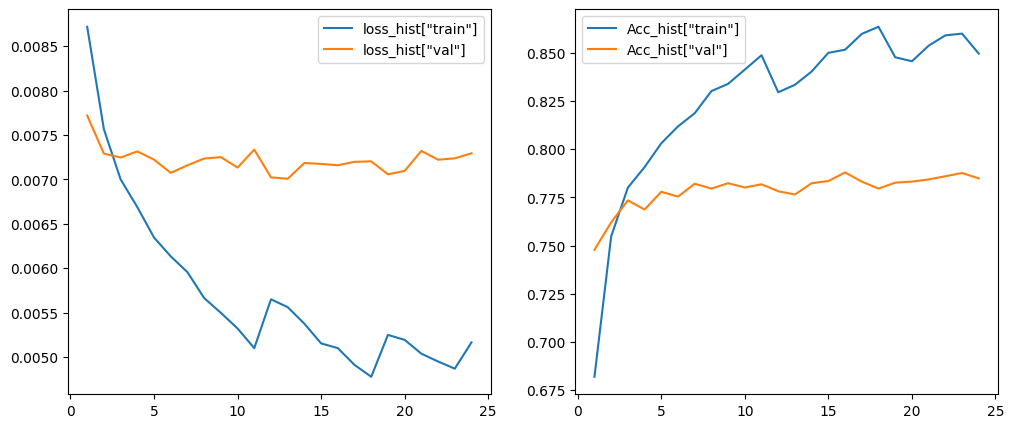

In [146]:

# Convergence History Plot
epochs=params_train["epochs"]
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(x=[*range(1,len(loss_hist["train"])+1)],y=loss_hist["train"],ax=ax[0],label='loss_hist["train"]')
sns.lineplot(x=[*range(1,len(loss_hist["val"])+1)],y=loss_hist["val"],ax=ax[0],label='loss_hist["val"]')
sns.lineplot(x=[*range(1,len(metric_train_hist)+1)],y=metric_train_hist,ax=ax[1],label='Acc_hist["train"]')
sns.lineplot(x=[*range(1,len(metric_val_hist)+1)],y=metric_val_hist,ax=ax[1],label='Acc_hist["val"]')

In [147]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# define function For Classification Report
import torch
from torchvision.models import resnet18, ResNet18_Weights
from sklearn.metrics import confusion_matrix, classification_report

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# define function For Classification Report
def Ture_and_Pred(val_loader, model):
    i = 0
    y_true = []
    y_pred = []
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs, _ = model(images)
        _, pred = outputs.topk(1, 1, True, True)
        pred = pred.t()

        y_true.extend(labels)
        y_pred.extend(pred.detach().cpu())
    y_pred2 = []
    y_true2 = []
    for el in y_pred:
        y_pred2.extend(el.tolist())
    y_true2 = list(map(lambda x: int(x), y_true))


    return y_true2, y_pred2

# check confusion matrix for error analysis
y_true, y_pred = Ture_and_Pred(val_loader, cnn_model)

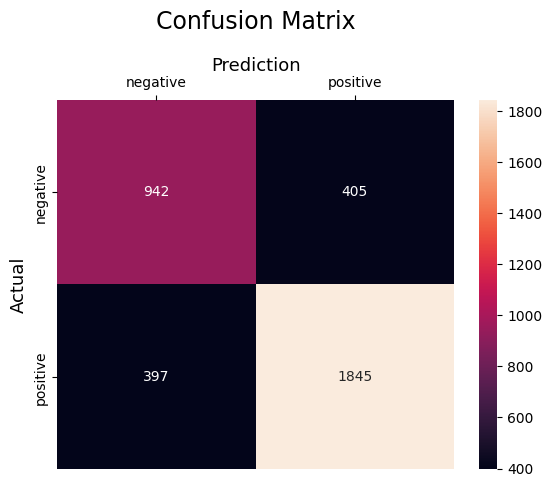

In [148]:
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.show()

In [149]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
f1_score_ = f1_score(y_true, y_pred, average='macro')
accuracy_score_ = accuracy_score(y_true, y_pred)
precision_score_ = precision_score(y_true, y_pred, average='macro')
recall_score_ = recall_score(y_true, y_pred, average='macro')

In [150]:
print("Metrics for validation")
print(f"F1 SCORE: {f1_score_}\nAccuracy score: {accuracy_score_}\nPrecision score:{precision_score_}\nRecall score:{recall_score_}")

Metrics for validation
F1 SCORE: 0.761437558555327
Accuracy score: 0.7765394260239621
Precision score:0.7617550410754295
Recall score:0.7611289037587741


In [151]:
y_true2, y_pred2 = Ture_and_Pred(test_loader, cnn_model)

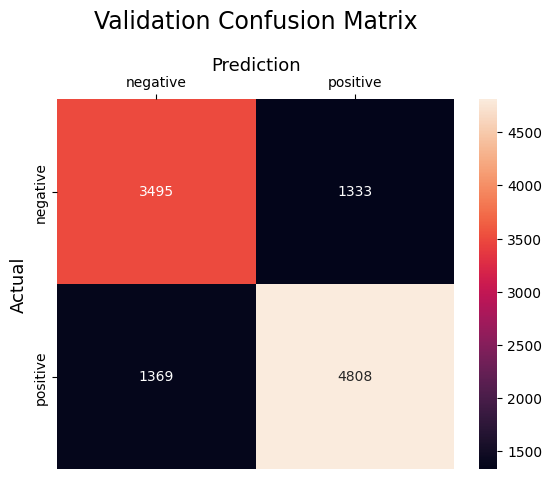

In [152]:
cm = confusion_matrix(y_true2,y_pred2)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.ylabel('Actual', fontsize=13)
plt.title('Validation Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.show()

In [153]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
f1_score2 = f1_score(y_true2, y_pred2, average='macro')
accuracy_score2 = accuracy_score(y_true2, y_pred2)
precision_score2 = precision_score(y_true2, y_pred2, average='macro')
recall_score2 = recall_score(y_true2, y_pred2, average='macro')

In [154]:
print("Metrics for test")
print(f"F1 SCORE: {f1_score2}\nAccuracy score: {accuracy_score2}\nPrecision score:{precision_score2}\nRecall score:{recall_score2}")

Metrics for test
F1 SCORE: 0.7509297903266023
Accuracy score: 0.7544752385279418
Precision score:0.7507393917018058
Recall score:0.7511368073212772


In [155]:
from torch import optim
import copy
net = LSTMRNN(bidirectional=True)

net = net.to(device)
from torch.optim.lr_scheduler import ReduceLROnPlateau
optimiser = optim.Adam(net.parameters(),lr=3e-4, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimiser,
                                mode='min',
                                factor=0.5,
                                patience=3)

params_train={
 "train": train_loader,"val": val_loader,
 "epochs": 50,
 "optimiser": optimiser,
 "lr_change": scheduler,
 "f_loss": nn.CrossEntropyLoss(),
 "weight_path": "weights.pt",
}

cnn_model2,loss_hist2,metric_hist2,best_model_wts2 = Train_Val(net,params_train, verbose=True, limit=True)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0/49, current lr=0.0003
Copied best model weights!
train loss: 0.008240, dev loss: 0.006941, accuracy: 79.60%
----------
Epoch 1/49, current lr=0.0003
Copied best model weights!
train loss: 0.006114, dev loss: 0.006245, accuracy: 82.59%
----------
Epoch 2/49, current lr=0.0003
Copied best model weights!
train loss: 0.004886, dev loss: 0.005747, accuracy: 84.03%
----------
Epoch 3/49, current lr=0.0003
train loss: 0.003945, dev loss: 0.006183, accuracy: 83.78%
----------
Epoch 4/49, current lr=0.0003
train loss: 0.003283, dev loss: 0.005983, accuracy: 83.84%
----------
Epoch 5/49, current lr=0.0003
train loss: 0.002542, dev loss: 0.006535, accuracy: 84.42%
----------
Epoch 6/49, current lr=0.0003
Loading best model weights!
train loss: 0.002154, dev loss: 0.006504, accuracy: 84.84%
----------
Epoch 7/49, current lr=0.00015
train loss: 0.003466, dev loss: 0.005908, accuracy: 85.32%
----------
Epoch 8/49, current lr=0.00015
train loss: 0.002817, dev loss: 0.006108, accuracy: 85.34%


In [170]:
loss_func = nn.CrossEntropyLoss()
test_loss, test_metric = loss_epoch(cnn_model2,loss_func,test_loader)

print(f"Test loss: {test_loss}. Accurracy for test: {float(test_metric)*100}")

Test loss: 0.00633761392756518. Accurracy for test: 81.83553218841553


In [172]:
metric_train_hist2 = []
metric_val_hist2 = []
for i in range(len(metric_hist2['train'])):
    metric_train_hist2.append((float)(metric_hist2['train'][i]))
for i in range(len(metric_hist2['val'])):
    metric_val_hist2.append((float)(metric_hist2['val'][i]))

<Axes: >

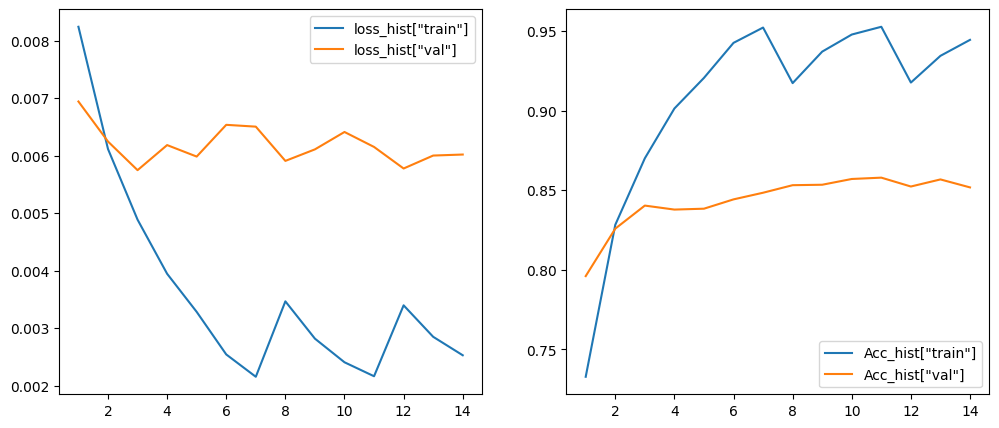

In [173]:

epochs=params_train["epochs"]
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(x=[*range(1,len(loss_hist2["train"])+1)],y=loss_hist2["train"],ax=ax[0],label='loss_hist["train"]')
sns.lineplot(x=[*range(1,len(loss_hist2["val"])+1)],y=loss_hist2["val"],ax=ax[0],label='loss_hist["val"]')
sns.lineplot(x=[*range(1,len(metric_train_hist2)+1)],y=metric_train_hist2,ax=ax[1],label='Acc_hist["train"]')
sns.lineplot(x=[*range(1,len(metric_val_hist2)+1)],y=metric_val_hist2,ax=ax[1],label='Acc_hist["val"]')

In [174]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# define function For Classification Report
# check confusion matrix for error analysis
y_true, y_pred = Ture_and_Pred(val_loader, cnn_model2)

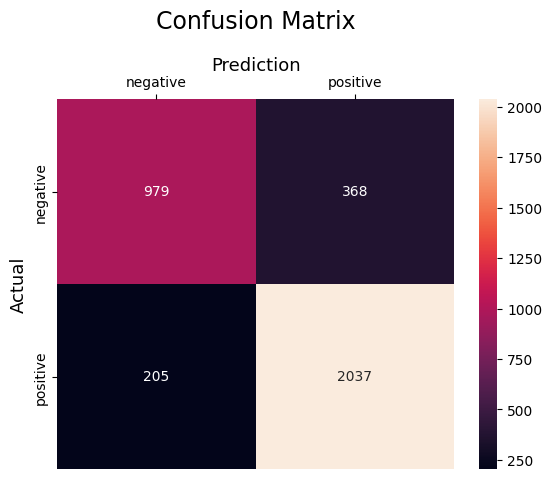

In [175]:
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.show()

In [176]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
f1_score3 = f1_score(y_true, y_pred, average='macro')
accuracy_score3 = accuracy_score(y_true, y_pred)
precision_score3 = precision_score(y_true, y_pred, average='macro')
recall_score3 = recall_score(y_true, y_pred, average='macro')

In [177]:
print("Metrics for validation")
print(f"F1 SCORE: {f1_score3}\nAccuracy score: {accuracy_score3}\nPrecision score:{precision_score3}\nRecall score:{recall_score3}")

Metrics for validation
F1 SCORE: 0.825150955779069
Accuracy score: 0.8403455001393145
Precision score:0.8369217775467775
Recall score:0.8176820396466989


In [178]:
y_true2, y_pred2 = Ture_and_Pred(test_loader, cnn_model2)

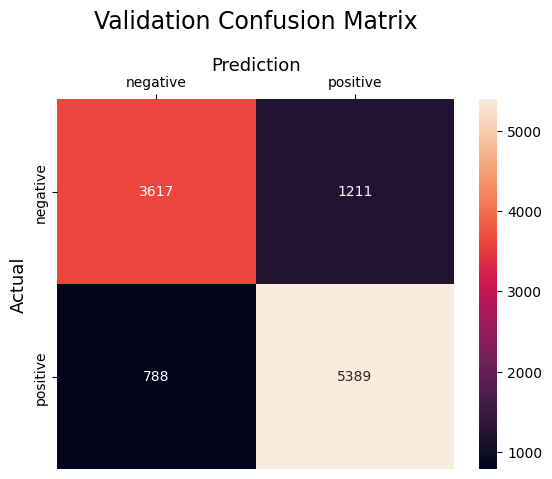

In [179]:
cm = confusion_matrix(y_true2,y_pred2)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=["negative", "positive"],
            yticklabels=["negative", "positive"])
plt.ylabel('Actual', fontsize=13)
plt.title('Validation Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.show()

<Axes: >

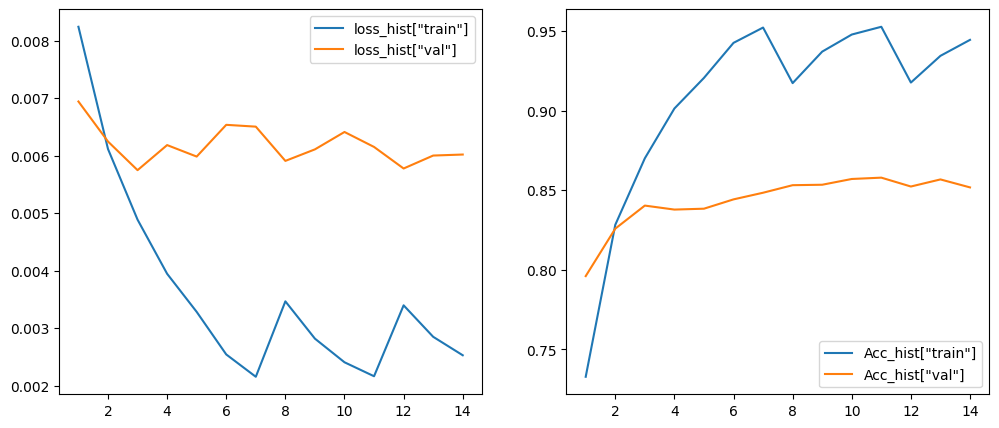

In [180]:

# Convergence History Plot
epochs=params_train["epochs"]
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(x=[*range(1,len(loss_hist2["train"])+1)],y=loss_hist2["train"],ax=ax[0],label='loss_hist["train"]')
sns.lineplot(x=[*range(1,len(loss_hist2["val"])+1)],y=loss_hist2["val"],ax=ax[0],label='loss_hist["val"]')
sns.lineplot(x=[*range(1,len(metric_train_hist2)+1)],y=metric_train_hist2,ax=ax[1],label='Acc_hist["train"]')
sns.lineplot(x=[*range(1,len(metric_val_hist2)+1)],y=metric_val_hist2,ax=ax[1],label='Acc_hist["val"]')

In [181]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
f1_score4 = f1_score(y_true2, y_pred2, average='macro')
accuracy_score4 = accuracy_score(y_true2, y_pred2)
precision_score4 = precision_score(y_true2, y_pred2, average='macro')
recall_score4 = recall_score(y_true2, y_pred2, average='macro')

In [182]:
print("Metrics for test")
print(f"F1 SCORE: {f1_score4}\nAccuracy score: {accuracy_score4}\nPrecision score:{precision_score4}\nRecall score:{recall_score4}")

Metrics for test
F1 SCORE: 0.8135204937328113
Accuracy score: 0.8183552930486143
Precision score:0.8188137619096756
Recall score:0.8108007408888762


In [126]:
from torch import optim
import copy
net = LSTMRNN(bidirectional=False)

net = net.to(device)
from torch.optim.lr_scheduler import ReduceLROnPlateau
optimiser = optim.Adam(net.parameters(),lr=3e-4, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimiser,
                                mode='min',
                                factor=0.5,
                                patience=3)

params_train={
 "train": train_loader,"val": val_loader,
 "epochs": 50,
 "optimiser": optimiser,
 "lr_change": scheduler,
 "f_loss": nn.CrossEntropyLoss(),
 "weight_path": "weights.pt",
}

cnn_model2,loss_hist2,metric_hist2,best_model_wts2 = Train_Val(net,params_train, verbose=True, limit=True)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0/49, current lr=0.0003
Copied best model weights!
train loss: 0.008487, dev loss: 0.007510, accuracy: 77.26%
----------
Epoch 1/49, current lr=0.0003
Copied best model weights!
train loss: 0.006451, dev loss: 0.006427, accuracy: 81.33%
----------
Epoch 2/49, current lr=0.0003
Copied best model weights!
train loss: 0.005256, dev loss: 0.005853, accuracy: 83.84%
----------
Epoch 3/49, current lr=0.0003
train loss: 0.004347, dev loss: 0.006040, accuracy: 84.31%
----------
Epoch 4/49, current lr=0.0003
train loss: 0.003642, dev loss: 0.006212, accuracy: 84.03%
----------
Epoch 5/49, current lr=0.0003
train loss: 0.003085, dev loss: 0.006503, accuracy: 84.42%
----------
Epoch 6/49, current lr=0.0003
Loading best model weights!
train loss: 0.002801, dev loss: 0.006605, accuracy: 83.92%
----------
Epoch 7/49, current lr=0.00015
Copied best model weights!
train loss: 0.004001, dev loss: 0.005781, accuracy: 84.84%
----------
Epoch 8/49, current lr=0.00015
train loss: 0.003421, dev loss: 

In [127]:
loss_func = nn.CrossEntropyLoss()
test_loss, test_metric = loss_epoch(cnn_model2,loss_func,test_loader)

print(f"Test loss: {test_loss}. Accurracy for test: {float(test_metric)*100}")

Test loss: 0.0064144885875809365. Accurracy for test: 82.72603750228882


In [131]:
metric_train_hist3 = []
metric_val_hist3 = []
for i in range(len(metric_hist2['train'])):
    metric_train_hist3.append((float)(metric_hist2['train'][i]))
for i in range(len(metric_hist2['val'])):
    metric_val_hist3.append((float)(metric_hist2['val'][i]))

<Axes: >

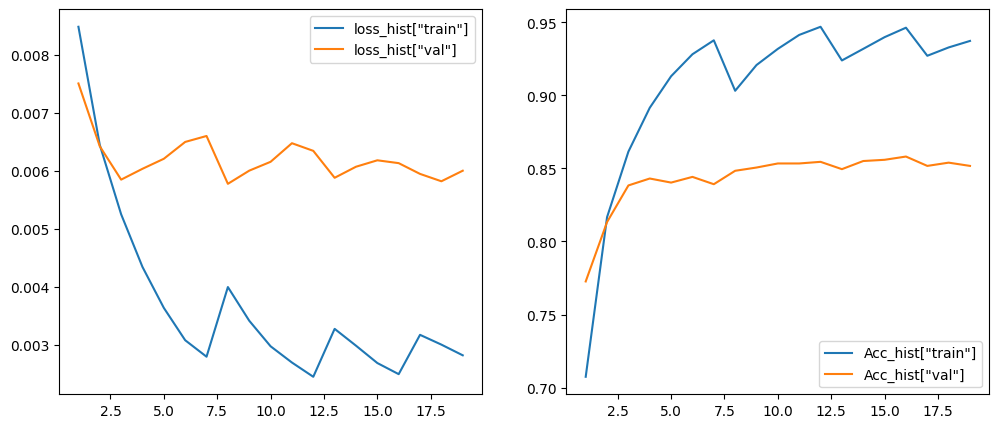

In [133]:

epochs=params_train["epochs"]
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(x=[*range(1,len(loss_hist2["train"])+1)],y=loss_hist2["train"],ax=ax[0],label='loss_hist["train"]')
sns.lineplot(x=[*range(1,len(loss_hist2["val"])+1)],y=loss_hist2["val"],ax=ax[0],label='loss_hist["val"]')
sns.lineplot(x=[*range(1,len(metric_train_hist3)+1)],y=metric_train_hist3,ax=ax[1],label='Acc_hist["train"]')
sns.lineplot(x=[*range(1,len(metric_val_hist3)+1)],y=metric_val_hist3,ax=ax[1],label='Acc_hist["val"]')

In [134]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# define function For Classification Report
# check confusion matrix for error analysis
y_true, y_pred = Ture_and_Pred(val_loader, cnn_model2)

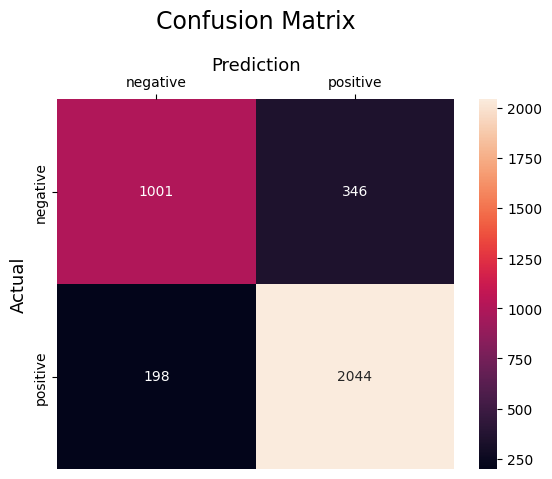

In [135]:
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.show()

In [136]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
f1_score5 = f1_score(y_true, y_pred, average='macro')
accuracy_score5 = accuracy_score(y_true, y_pred)
precision_score5 = precision_score(y_true, y_pred, average='macro')
recall_score5 = recall_score(y_true, y_pred, average='macro')

In [137]:
print("Metrics for validation")
print(f"F1 SCORE: {f1_score5}\nAccuracy score: {accuracy_score5}\nPrecision score:{precision_score5}\nRecall score:{recall_score5}")

Metrics for validation
F1 SCORE: 0.8344438158267837
Accuracy score: 0.8484257453329618
Precision score:0.8450462554220568
Recall score:0.8274094412733355


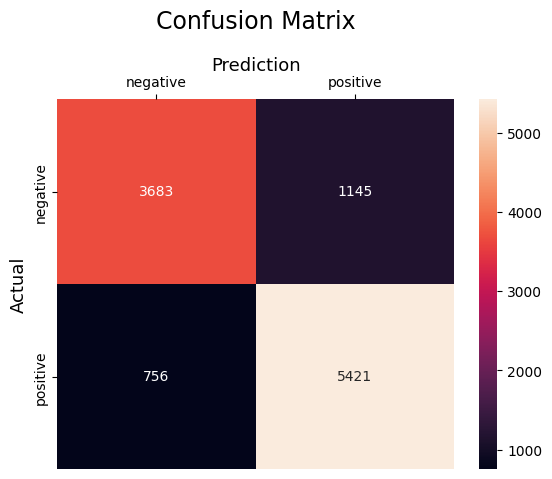

In [139]:
y_true, y_pred = Ture_and_Pred(test_loader, cnn_model2)
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.show()

In [140]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
f1_score6 = f1_score(y_true, y_pred, average='macro')
accuracy_score6 = accuracy_score(y_true, y_pred)
precision_score6 = precision_score(y_true, y_pred, average='macro')
recall_score6 = recall_score(y_true, y_pred, average='macro')

In [141]:
print("Metrics for validation")
print(f"F1 SCORE: {f1_score6}\nAccuracy score: {accuracy_score6}\nPrecision score:{precision_score6}\nRecall score:{recall_score6}")

Metrics for validation
F1 SCORE: 0.8228417760950072
Accuracy score: 0.8272603362108133
Precision score:0.827654092910175
Recall score:0.8202261234751307


In [183]:
from prettytable import PrettyTable


table = PrettyTable(["model", "epoch", "optimizer", "lr_change", "f_loss", "modifications", "Dataset Type",  "Accuracy",  "F1-score", "Precision", "Recall"])
table.add_row([f"Simple RNN", "100", "optim.Adam() with lr=3e-4, weight_decay=1e-4", "ReduceLROnPlateau with mode='min',factor=0.5,patience=4","nn.CrossEntropyLoss(label_smoothing=0.1)", "None", "validation", accuracy_score_, f1_score_, precision_score_, recall_score_ ])
table.add_row([f"Simple RNN","100", "optim.Adam() with lr=3e-4, weight_decay=1e-4", "ReduceLROnPlateau with mode='min',factor=0.5,patience=4", "nn.CrossEntropyLoss(label_smoothing=0.1)", "None", "test", accuracy_score2, f1_score2, precision_score2, recall_score2])

table.add_row([f"LSTM bidirectional", "50","optim.Adam() with lr=3e-4, weight_decay=1e-4", "ReduceLROnPlateau with mode='min',factor=0.5,patience=4","nn.CrossEntropyLoss(label_smoothing=0.1)", "None", "validation", accuracy_score3, f1_score3, precision_score3, recall_score3 ])
table.add_row([f"LSTM bidirectional", "50","optim.Adam() with lr=3e-4, weight_decay=1e-4", "ReduceLROnPlateau with mode='min',factor=0.5,patience=4", "nn.CrossEntropyLoss(label_smoothing=0.1)", "None", "test", accuracy_score4, f1_score4, precision_score4, recall_score4])

table.add_row([f"LSTM unidirectional", "50","optim.Adam() with lr=3e-4, weight_decay=1e-4", "ReduceLROnPlateau with mode='min',factor=0.5,patience=4","nn.CrossEntropyLoss(label_smoothing=0.1)", "None", "validation", accuracy_score5, f1_score5, precision_score5, recall_score5 ])
table.add_row([f"LSTM unidirectional", "50","optim.Adam() with lr=3e-4, weight_decay=1e-4", "ReduceLROnPlateau with mode='min',factor=0.5,patience=4", "nn.CrossEntropyLoss(label_smoothing=0.1)", "None", "test", accuracy_score6, f1_score6, precision_score6, recall_score6])

print(table)


+---------------------+-------+----------------------------------------------+---------------------------------------------------------+------------------------------------------+---------------+--------------+--------------------+--------------------+--------------------+--------------------+
|        model        | epoch |                  optimizer                   |                        lr_change                        |                  f_loss                  | modifications | Dataset Type |      Accuracy      |      F1-score      |     Precision      |       Recall       |
+---------------------+-------+----------------------------------------------+---------------------------------------------------------+------------------------------------------+---------------+--------------+--------------------+--------------------+--------------------+--------------------+
|      Simple RNN     |  100  | optim.Adam() with lr=3e-4, weight_decay=1e-4 | ReduceLROnPlateau with mode='min',fa